![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [10]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [11]:
# Create dummy variables for the 'sex' column
penguins_df = pd.get_dummies(penguins_df, columns=['sex'], drop_first=True)

# Standardize the features before clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(penguins_df)

# Display the first few rows of the scaled features
pd.DataFrame(scaled_features, columns=penguins_df.columns).head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994


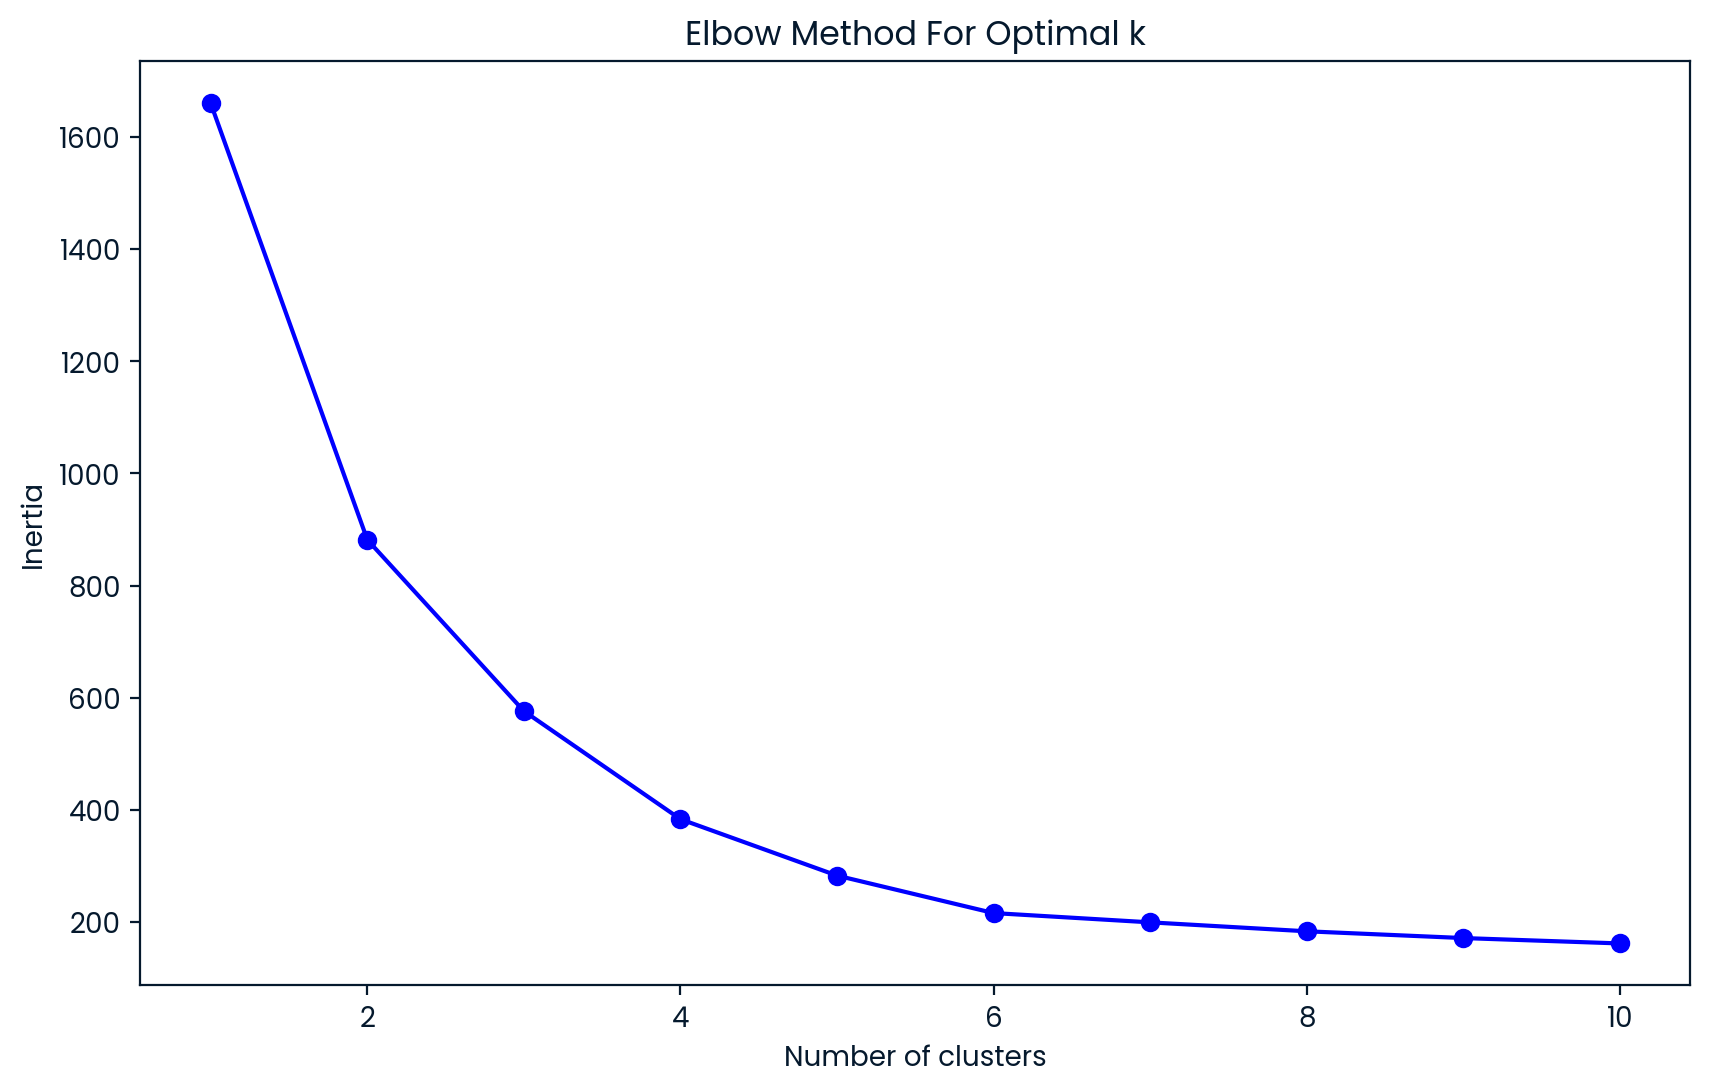

In [12]:
# Perform Elbow analysis to determine the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
# Based on the Elbow method, let's assume the optimal number of clusters is 3
optimal_clusters = 3

# Run k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
penguins_df['cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows of the dataframe with the cluster assignments
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,39.1,18.7,181.0,3750.0,1,0
1,39.5,17.4,186.0,3800.0,0,2
2,40.3,18.0,195.0,3250.0,0,2
3,36.7,19.3,193.0,3450.0,0,2
4,39.3,20.6,190.0,3650.0,1,0


In [14]:
# Create a final characteristic DataFrame for each cluster
cluster_characteristics = penguins_df.groupby('cluster').mean()

# Rename the columns to indicate they are mean values
cluster_characteristics.columns = [f"mean_{col}" for col in cluster_characteristics.columns]

# Create the final stat_penguins DataFrame
stat_penguins = cluster_characteristics.reset_index()

# Display the stat_penguins DataFrame
stat_penguins

,cluster,mean_culmen_length_mm,mean_culmen_depth_mm,mean_flipper_length_mm,mean_body_mass_g,mean_sex_MALE
0,0,43.878302,19.111321,194.764151,4006.603774,1.000000
1,1,47.568067,14.996639,217.235294,5092.436975,0.512605
2,2,40.217757,17.611215,189.046729,3419.158879,0.000000


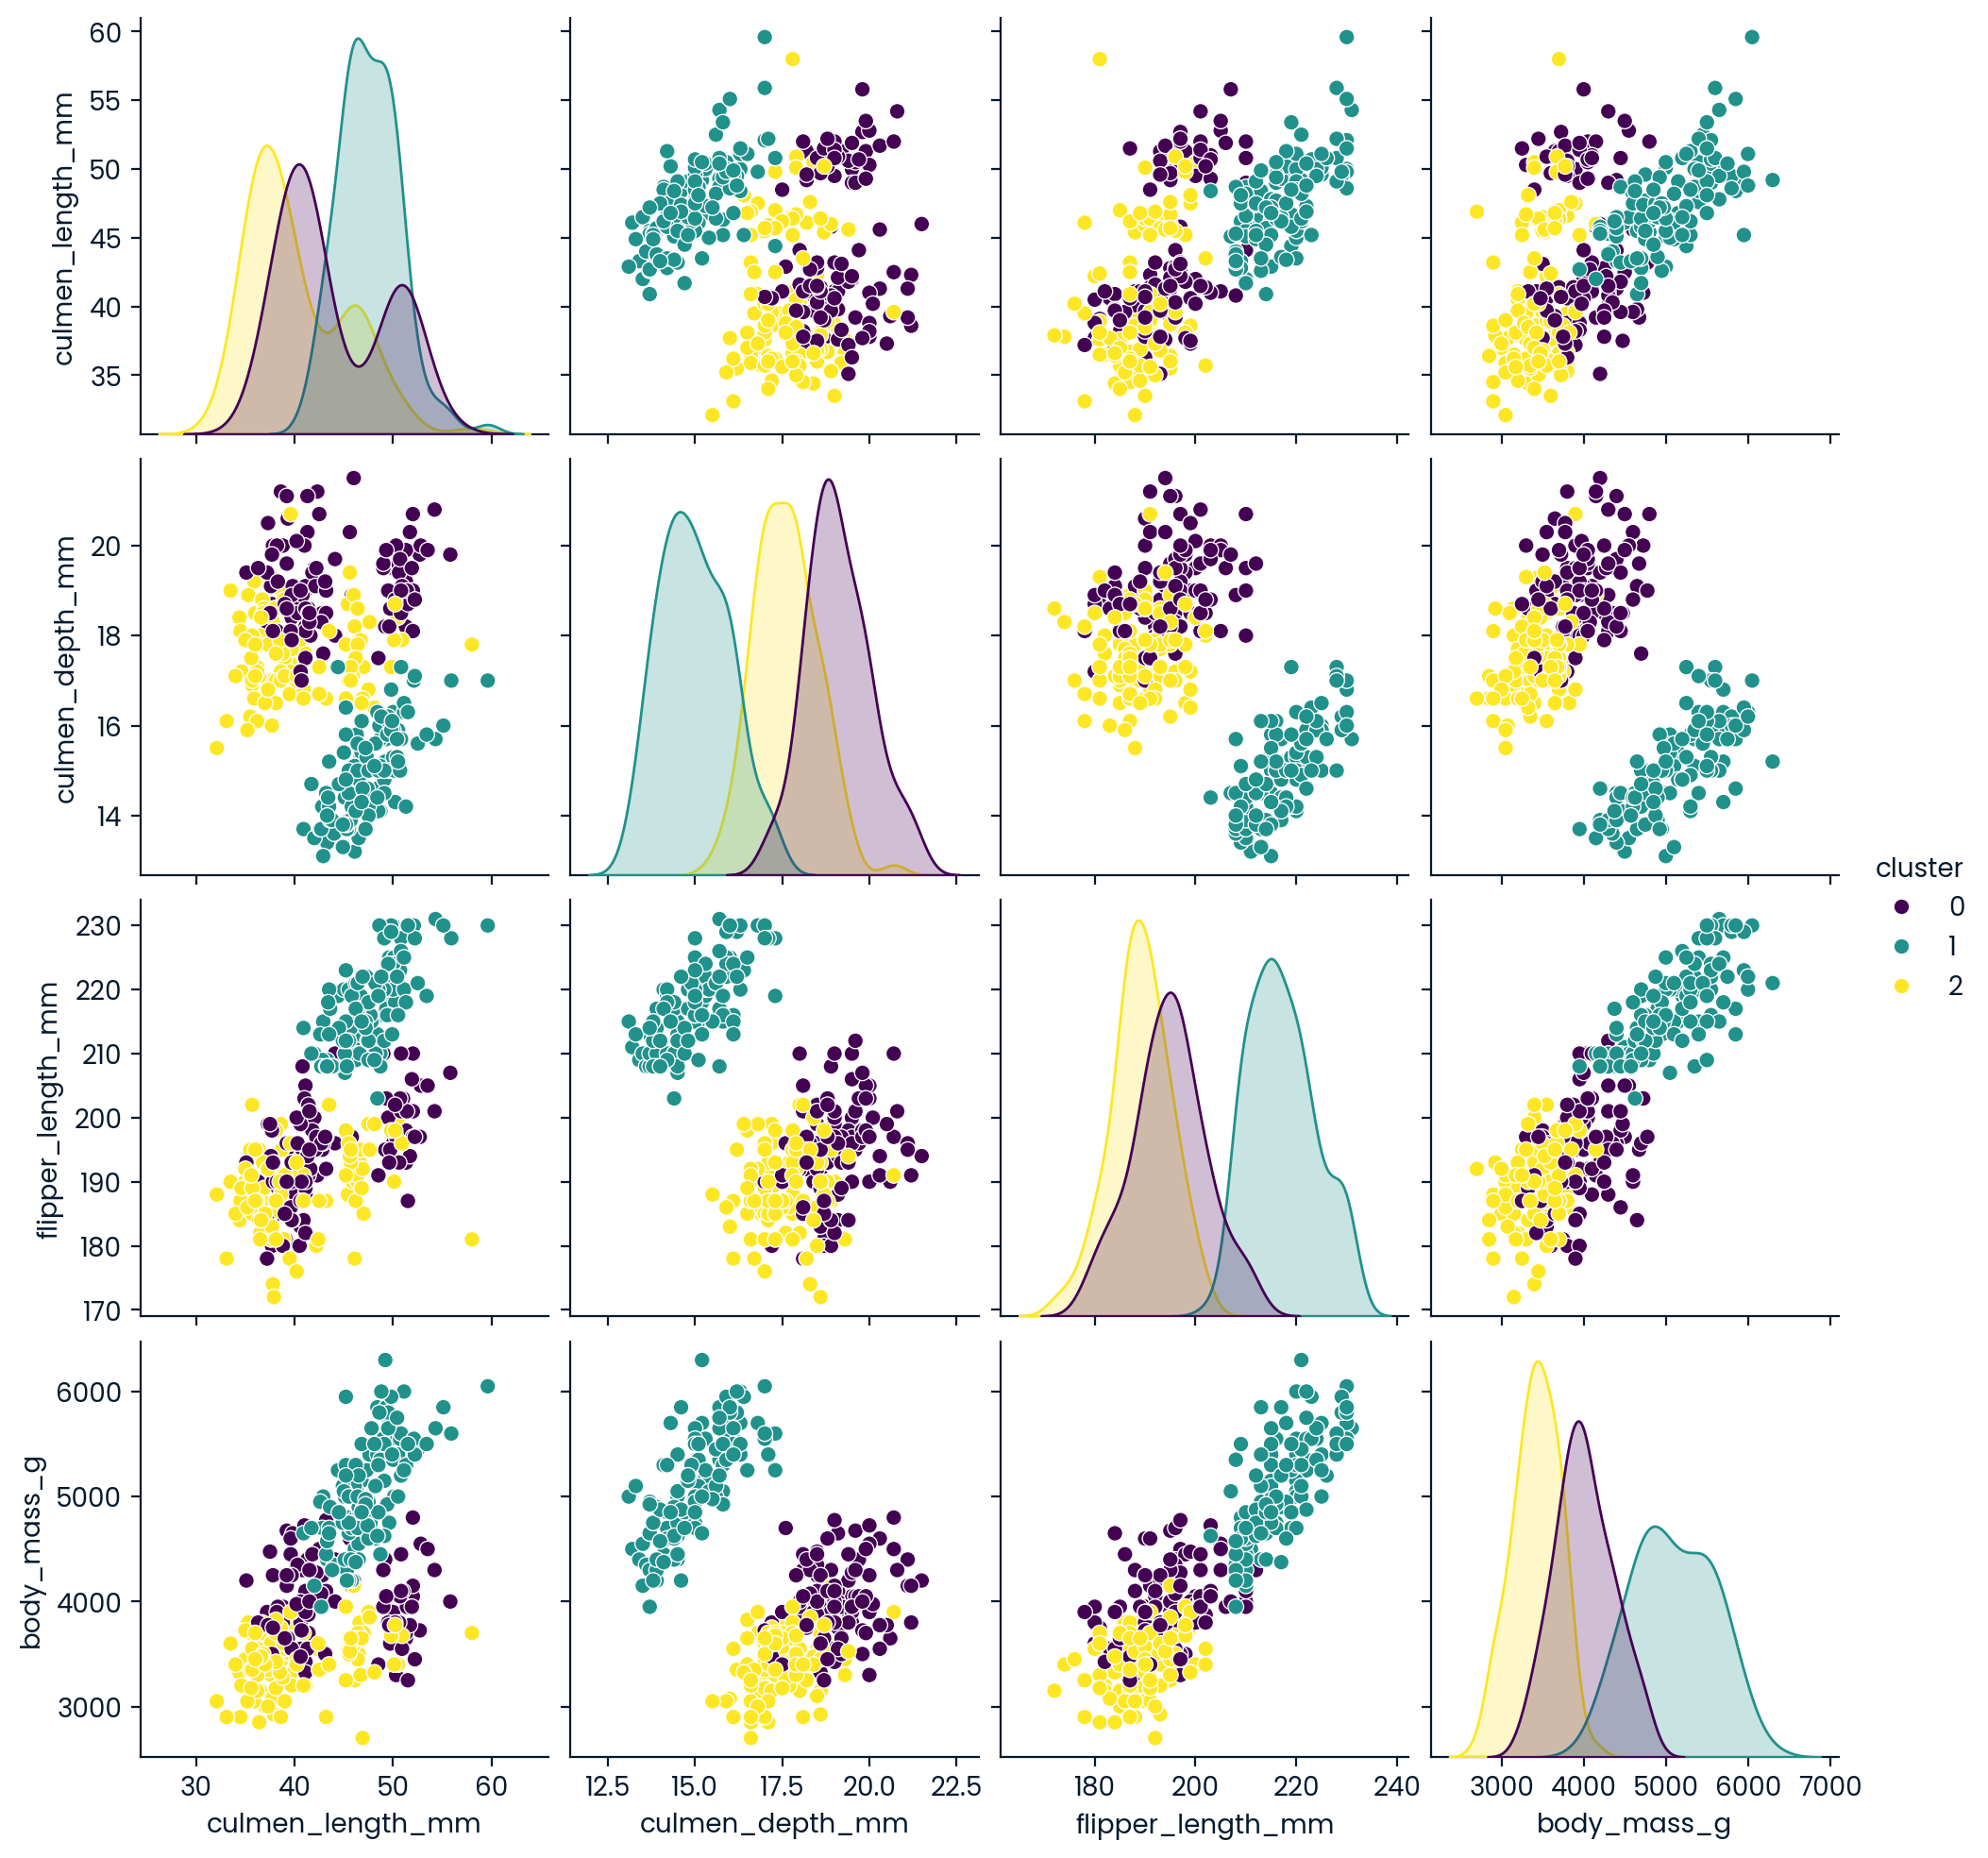

In [15]:
# Visualize the clusters using a pairplot
import seaborn as sns

# Create a pairplot with the clusters colored
sns.pairplot(penguins_df, hue='cluster', vars=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], palette='viridis')

# Show the plot
plt.show()